In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


accident = pd.read_csv('Data/FARS2021NationalCSV/accident.csv', encoding='ISO-8859-1')
event = pd.read_csv('Data/FARS2021NationalCSV/cevent.csv', encoding='ISO-8859-1')
accident.columns = accident.columns.str.strip()
event.columns = event.columns.str.strip()




In [59]:
accident_columns_to_drop = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                   36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
                   64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

# Drop the specified columns by index
accident = accident.drop(accident.columns[accident_columns_to_drop], axis=1)

event_columns_to_drop = [9, 10, 11, 12]
event = event.drop(event.columns[event_columns_to_drop], axis = 1)

In [60]:
df = pd.merge(accident, event, on='ST_CASE', how='inner')
df

,STATE_x,STATENAME_x,ST_CASE,DAYNAME,DAY_WEEKNAME,HOUR,MINUTE,STATE_y,STATENAME_y,EVENTNUM,VNUMBER1,AOI1,AOI1NAME,SOE,SOENAME
0,1,Alabama,10001,12,Friday,22,10,1,Alabama,1,1,12,12 Clock Point,12,Motor Vehicle In-Transport
1,1,Alabama,10002,11,Thursday,18,0,1,Alabama,1,1,55,Non-Harmful Event,64,Ran Off Roadway - Left
2,1,Alabama,10002,11,Thursday,18,0,1,Alabama,2,1,11,11 Clock Point,25,Concrete Traffic Barrier
3,1,Alabama,10002,11,Thursday,18,0,1,Alabama,3,1,55,Non-Harmful Event,69,Re-entering Roadway
4,1,Alabama,10002,11,Thursday,18,0,1,Alabama,4,1,55,Non-Harmful Event,63,Ran Off Roadway - Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112720,56,Wyoming,560102,15,Wednesday,10,34,56,Wyoming,1,1,55,Non-Harmful Event,63,Ran Off Roadway - Right
112721,56,Wyoming,560102,15,Wednesday,10,34,56,Wyoming,2,1,0,Non-Collision,1,Rollover/Overturn
112722,56,Wyoming,560103,19,Sunday,17,9,56,Wyoming,1,1,12,12 Clock Point,8,Pedestrian
112723,56,Wyoming,560104,20,Monday,6,30,56,Wyoming,1,1,55,Non-Harmful Event,68,Cross Centerline


In [39]:
print(df.shape)

(112725, 15)


In [40]:
df = df.drop(columns=['STATE_y', 'STATENAME_y'])

In [41]:
numerical_vars = df.select_dtypes(include=[np.number])
numerical_summary = numerical_vars.describe()

# Calculate variance for numerical variables (since it's not included in the describe method by default)
variance = numerical_vars.var()

# Add variance to the summary statistics
numerical_summary.loc['variance'] = variance

numerical_summary

,STATE_x,ST_CASE,DAYNAME,HOUR,MINUTE,EVENTNUM,VNUMBER1,AOI1,SOE
count,112725.000000,1.127250e+05,112725.000000,112725.000000,112725.000000,112725.000000,112725.000000,112725.000000,112725.000000
mean,27.475697,2.756416e+05,15.631076,13.311040,29.082990,2.706480,1.277764,34.825301,35.383633
std,16.452688,1.644243e+05,8.871515,10.491582,18.481930,3.216187,2.629577,30.664740,25.523239
min,1.000000,1.000100e+04,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,12.000000,1.222640e+05,8.000000,7.000000,14.000000,1.000000,1.000000,12.000000,12.000000
50%,27.000000,2.704430e+05,16.000000,14.000000,30.000000,2.000000,1.000000,12.000000,34.000000
75%,42.000000,4.207750e+05,23.000000,19.000000,44.000000,3.000000,1.000000,55.000000,63.000000
max,56.000000,5.601040e+05,31.000000,99.000000,99.000000,134.000000,130.000000,99.000000,99.000000
variance,270.690950,2.703535e+10,78.703777,110.073297,341.581745,10.343860,6.914676,940.326272,651.435726


/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5884/397954953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y=column_name, order=data[column_name].value_counts().index,  palette="husl")


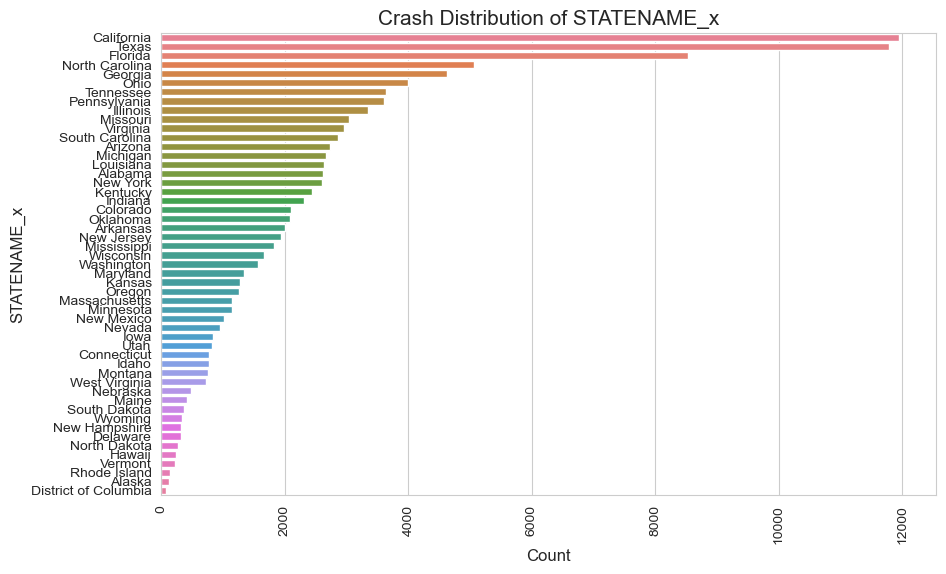

In [46]:
sns.set_style("whitegrid")

# Function to create bar plots for categorical variables
def plot_categorical_distribution(data, column_name, plot_size=(10, 6), rotation_angle=90):
    plt.figure(figsize=plot_size)
    ax = sns.countplot(data=data, y=column_name, order=data[column_name].value_counts().index,  palette="husl")
    ax.set_title(f'Crash Distribution Summary of {column_name}', fontsize=15)
    ax.set_ylabel(column_name, fontsize=12)
    ax.set_xlabel('Count', fontsize=12)
    plt.xticks(rotation=rotation_angle)
    plt.show()

# Plot the distribution of STATENAME_x
plot_categorical_distribution(df, 'STATENAME_x')

/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5884/397954953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y=column_name, order=data[column_name].value_counts().index,  palette="husl")


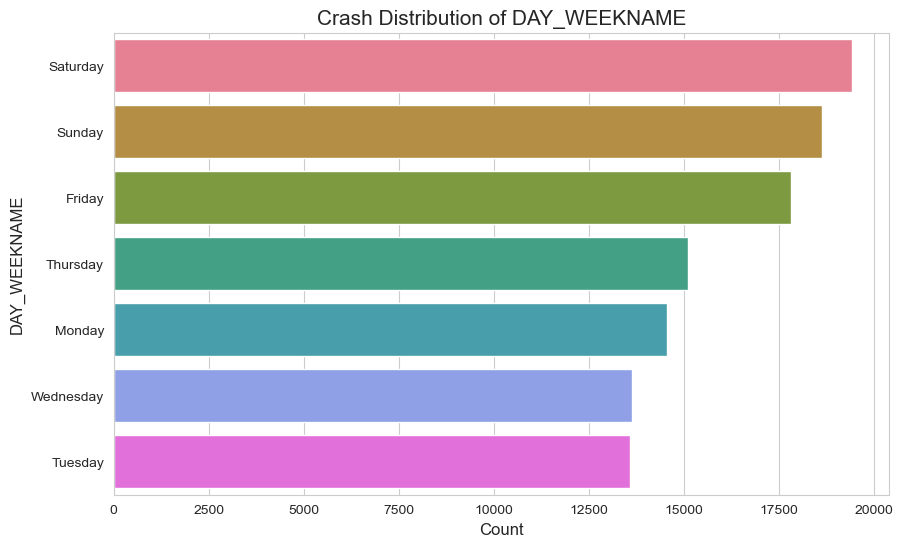

In [49]:
plot_categorical_distribution(df, 'DAY_WEEKNAME', rotation_angle=0)


/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5884/397954953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y=column_name, order=data[column_name].value_counts().index,  palette="husl")


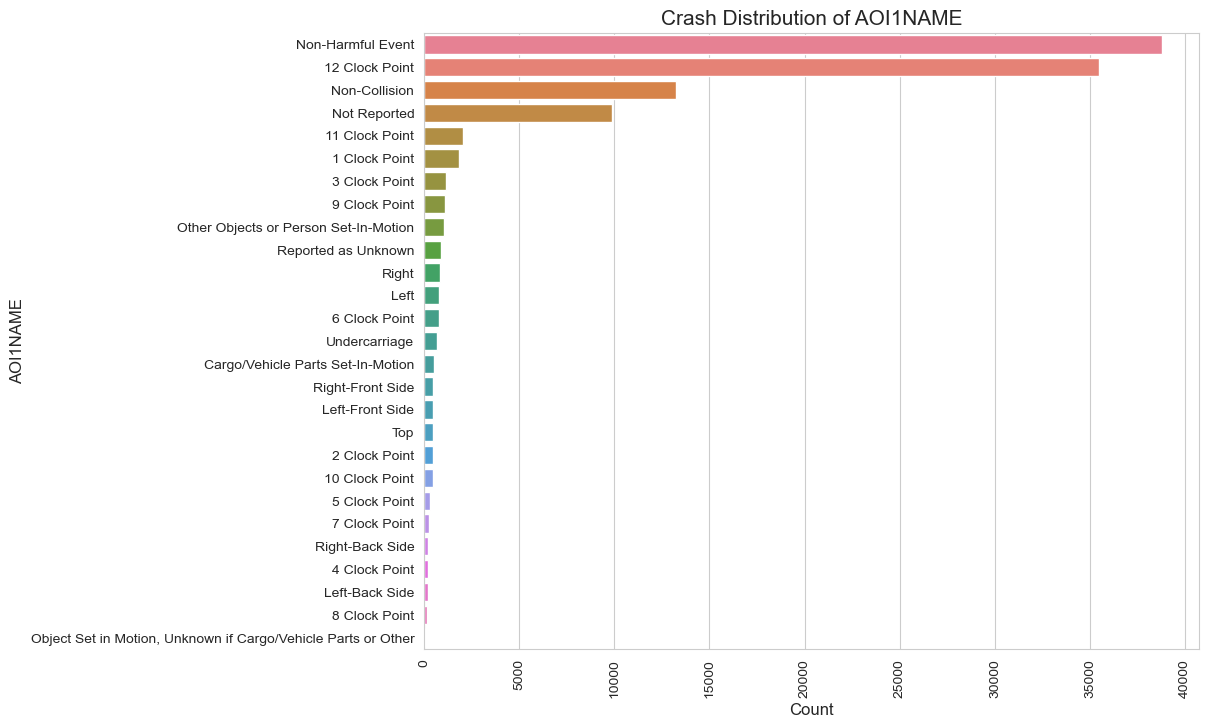

In [48]:
# Plot the distribution of AOI1NAME with a rainbow color palette
plot_categorical_distribution(df, 'AOI1NAME', plot_size=(10, 8))


In [50]:
# Calculate the correlation matrix for the numerical variables Step 4
correlation_matrix = numerical_vars.corr()

correlation_matrix

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

# Set the title and show the plot
ax.set_title('Correlation Matrix', fontsize=15)
plt.show()


,STATE_x,ST_CASE,DAYNAME,HOUR,MINUTE,EVENTNUM,VNUMBER1,AOI1,SOE
STATE_x,1.000000,0.999983,0.000383,-0.002756,0.004662,0.027076,0.036292,-0.026817,0.030156
ST_CASE,0.999983,1.000000,0.000646,-0.002934,0.004684,0.027070,0.036291,-0.026784,0.029895
DAYNAME,0.000383,0.000646,1.000000,0.004247,0.001477,-0.007234,-0.016260,-0.001981,0.003662
HOUR,-0.002756,-0.002934,0.004247,1.000000,0.264396,-0.029973,-0.022275,0.007379,-0.005299
MINUTE,0.004662,0.004684,0.001477,0.264396,1.000000,-0.041524,-0.046012,0.009566,0.000916
EVENTNUM,0.027076,0.027070,-0.007234,-0.029973,-0.041524,1.000000,0.822694,0.016616,0.001920
VNUMBER1,0.036292,0.036291,-0.016260,-0.022275,-0.046012,0.822694,1.000000,-0.014455,0.048013
AOI1,-0.026817,-0.026784,-0.001981,0.007379,0.009566,0.016616,-0.014455,1.000000,0.563003
SOE,0.030156,0.029895,0.003662,-0.005299,0.000916,0.001920,0.048013,0.563003,1.000000


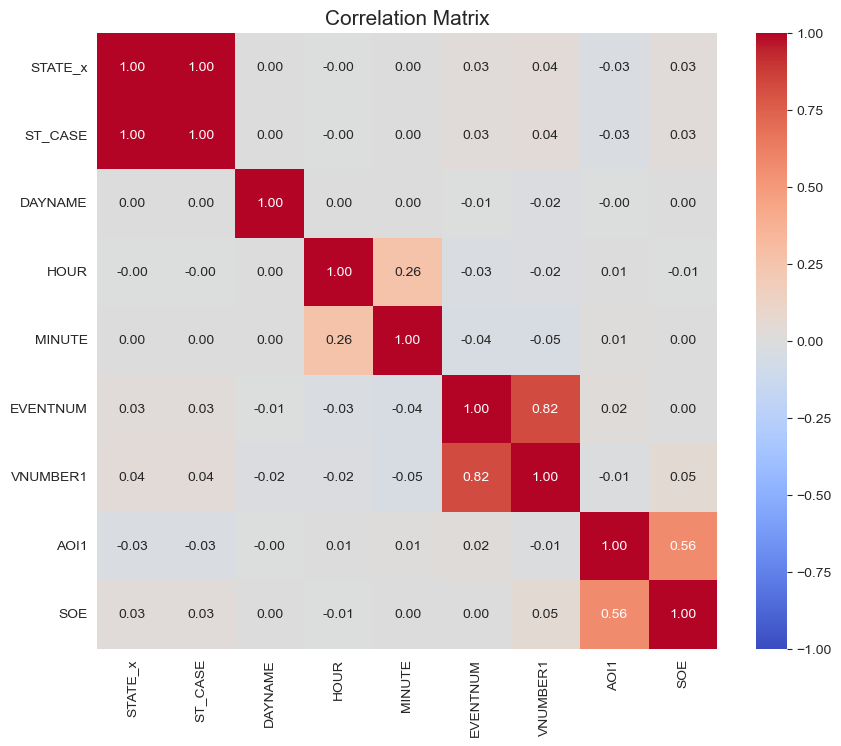

In [61]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

# Set the title and show the plot
ax.set_title('Correlation Matrix', fontsize=15)
plt.show()


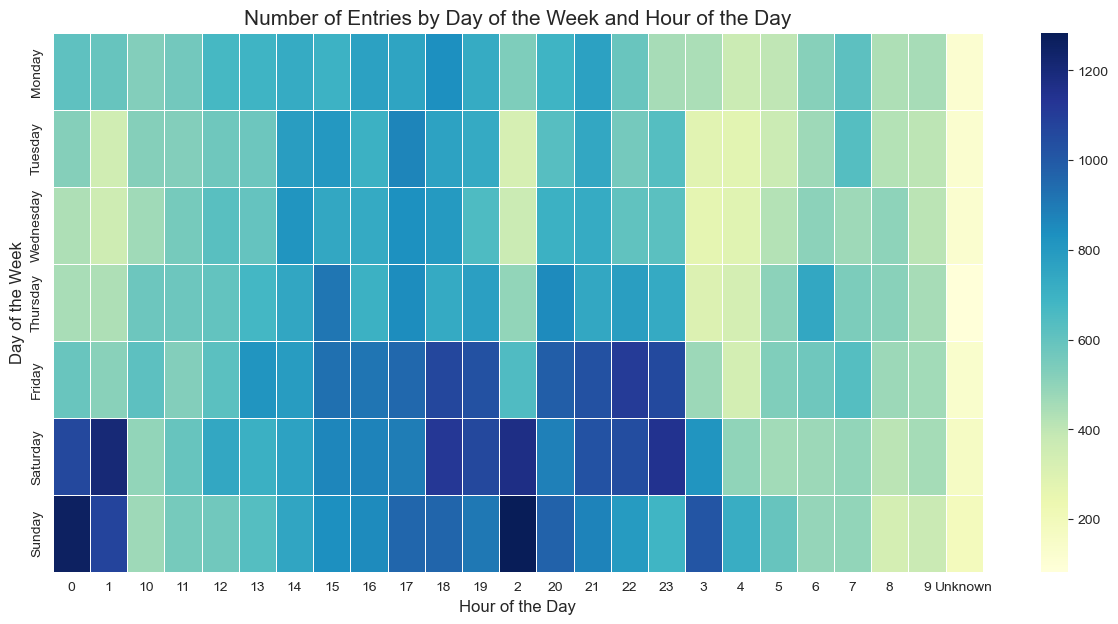

In [52]:
# Convert HOUR from numeric to categorical to better handle the 99 (unknown) values
df['HOUR'] = df['HOUR'].astype(str).replace('99', 'Unknown')

# Create a pivot table to count the number of entries for each combination of DAY_WEEKNAME and HOUR
hour_weekday_pivot = pd.pivot_table(df, index='DAY_WEEKNAME', columns='HOUR', aggfunc='size', fill_value=0)

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_weekday_pivot = hour_weekday_pivot.reindex(days_order)

# Create the heatmap
plt.figure(figsize=(15, 7))
ax = sns.heatmap(hour_weekday_pivot, cmap="YlGnBu", linewidths=.5)

# Set the title and labels
ax.set_title('Number of Entries by Day of the Week and Hour of the Day', fontsize=15)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Day of the Week', fontsize=12)

plt.show()



Hypothesis Generation
Based on the exploratory data analysis we've conducted so far, here are some potential hypotheses and questions:

Time of Day and Incidents:

Hypothesis: There are more incidents in the afternoon and evening compared to other times of the day.
Potential Analysis: Investigate if certain types of incidents are more likely to occur during these times.
Weekend Driving Behavior:

Hypothesis: Driving behavior during the weekends, especially late at night and in the early morning hours, leads to more incidents.
Potential Analysis: Examine the types of incidents that occur during these times and if they are different from weekday incidents.
State-wise Distribution:

Question: Why do some states have significantly more incidents recorded in the dataset? Is it due to population, traffic volume, or data collection methods?
Potential Analysis: Normalize the data by population or traffic volume to better understand the state-wise distribution.
Impact Areas:

Hypothesis: Certain areas of impact, such as the "Non-Harmful Event" and "12 Clock Point", are more common.
Potential Analysis: Investigate the circumstances that lead to these common impact areas.
Sequence of Events:

Hypothesis: The "Motor Vehicle In-Transport" event is the most common sequence of events leading to incidents.
Potential Analysis: Explore what specific situations or factors contribute to this sequence of events.

## Grouping by State
California and Texas have the highest number of entries, with 11,952 and 11,787 incidents respectively.
States like Alaska, District of Columbia, and Rhode Island have the lowest number of entries, all below 150 incidents.

/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5884/3716315958.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=state_group.index, y=state_group.values, palette="husl")


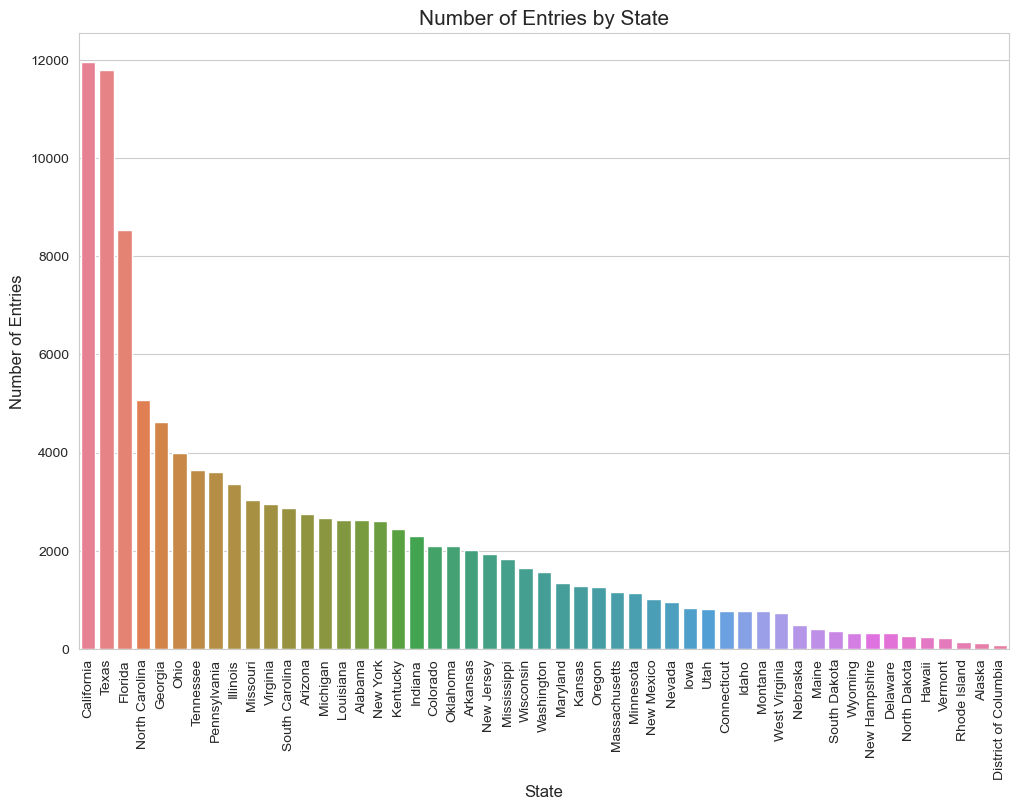

In [55]:
# Group the data by state and calculate the total number of entries for each state
state_group = df.groupby('STATENAME_x').size().sort_values(ascending=False)

state_group

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for the number of entries by state
ax = sns.barplot(x=state_group.index, y=state_group.values, palette="husl")

# Set the title and labels
ax.set_title('Number of Entries by State', fontsize=15)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Entries', fontsize=12)
plt.xticks(rotation=90)

# Show the plot
plt.show()



## Grouping by Time of the Day

/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5884/3951407133.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=time_of_day_group.index, y=time_of_day_group.values, palette="husl")


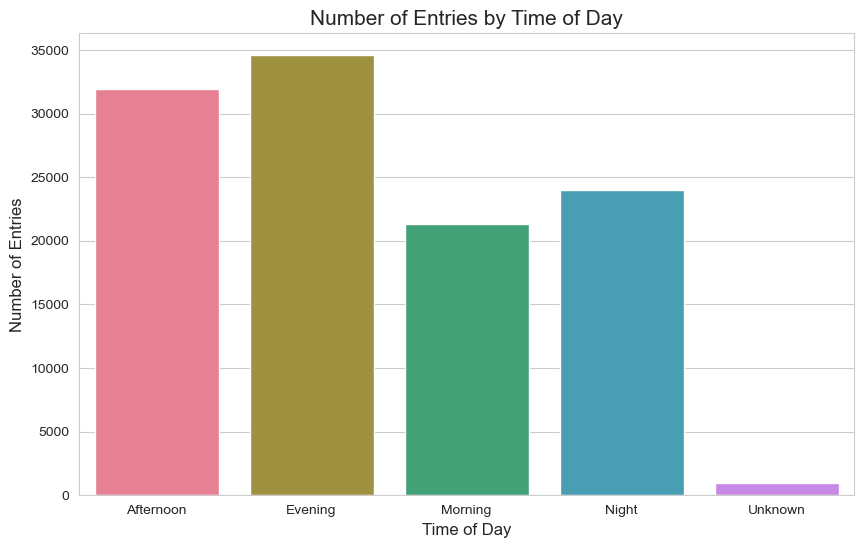

In [56]:
# Convert HOUR back to numeric, treating "Unknown" as a missing value
df['HOUR'] = pd.to_numeric(df['HOUR'], errors='coerce')

# Define a function to categorize the time of day
def categorize_time_of_day(hour):
    if pd.isna(hour):
        return "Unknown"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

# Apply the function to create a new variable "TIME_OF_DAY"
df['TIME_OF_DAY'] = df['HOUR'].apply(categorize_time_of_day)

# Group the data by "TIME_OF_DAY" and calculate the total number of entries for each time segment
time_of_day_group = df.groupby('TIME_OF_DAY').size().sort_index()

time_of_day_group

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a bar plot for the number of entries by time of day
ax = sns.barplot(x=time_of_day_group.index, y=time_of_day_group.values, palette="husl")

# Set the title and labels
ax.set_title('Number of Entries by Time of Day', fontsize=15)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Number of Entries', fontsize=12)

# Show the plot
plt.show()



Step 7 

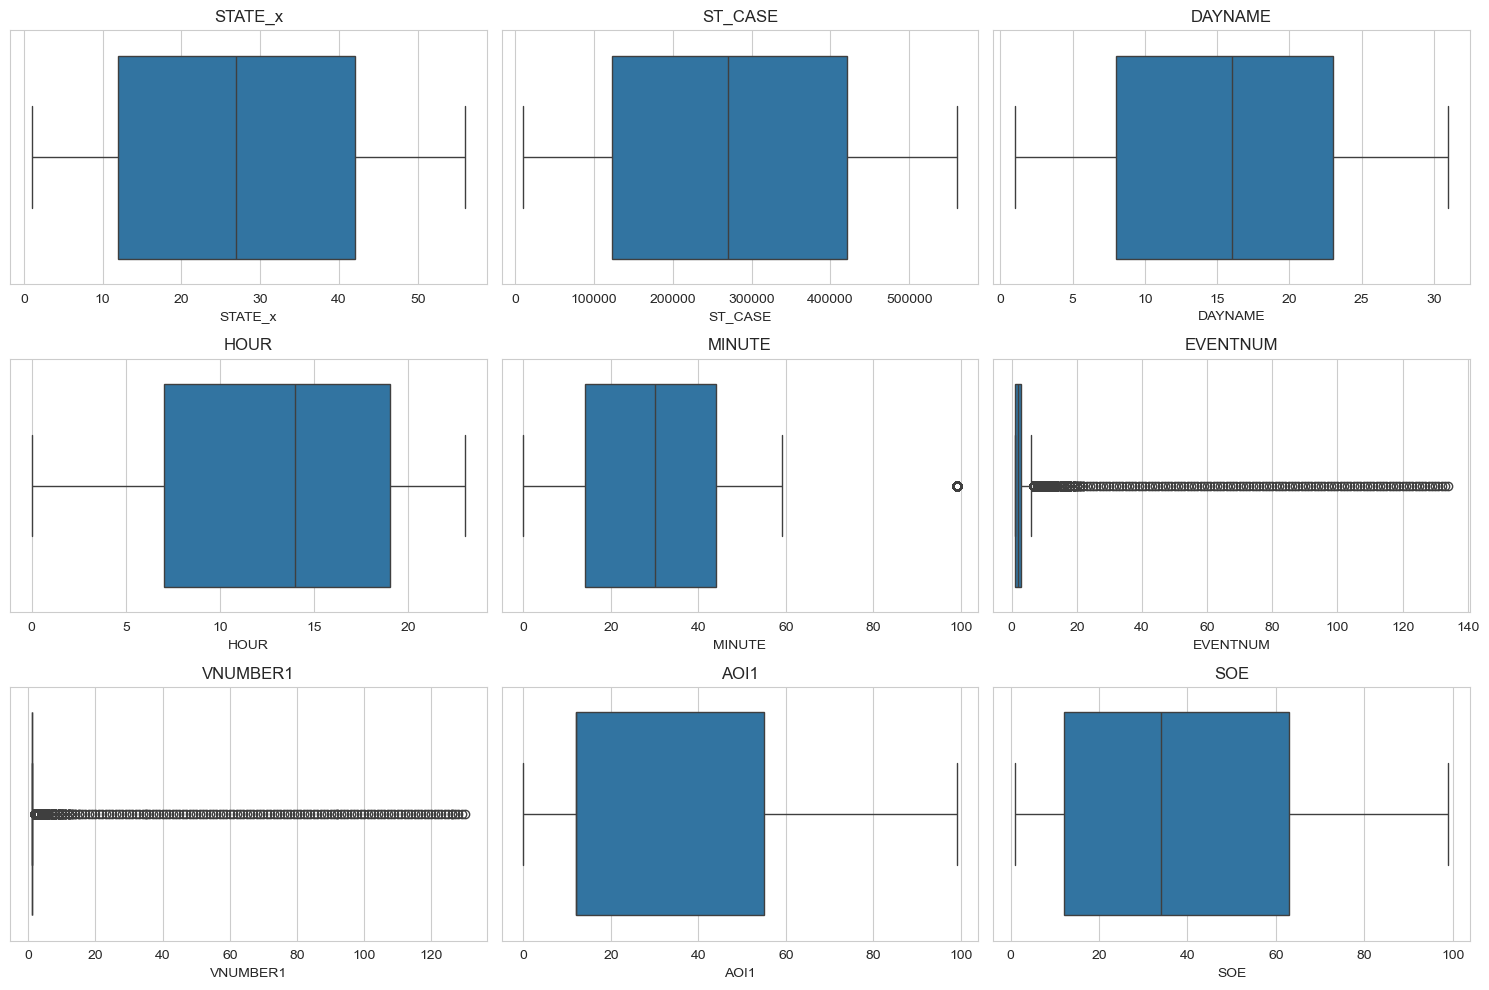

In [57]:
# Set the size of the plots
plt.figure(figsize=(15, 10))

# Create box plots for the numerical variables
for i, column in enumerate(numerical_vars.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


EVENTNUM, VNUMBER1, AOI1, SOE: These variables have a significant number of high values that could be considered outliers. However, without more context on what these numbers represent, it’s challenging to definitively label them as outliers.
To properly handle the potential outliers, we would need additional context on the data and the variables, especially for the ones with coded values (EVENTNUM, VNUMBER1, AOI1, SOE).